## Club lending project

Based on the dataset we will be able to determine if a borrower will pay back their loan or not, this will help us to determine future customer of the lending club.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'D:\python\TensorFlow_Keras\TensorFlow_FILES\DATA\lending_club_loan_two.csv')

### exploring the data

In [3]:
data.shape

(396030, 27)

In [4]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [5]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [7]:
# lets find how many missing data are there
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

### Discover and visiulize our data

<AxesSubplot:xlabel='loan_status', ylabel='count'>

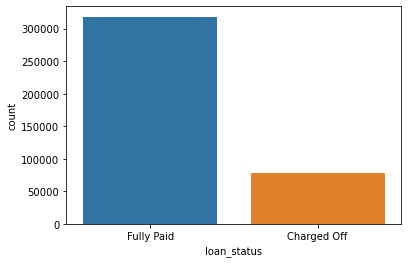

In [8]:
# loan_status is our label column
sns.countplot(x='loan_status', data=data)

<AxesSubplot:xlabel='mort_acc', ylabel='count'>

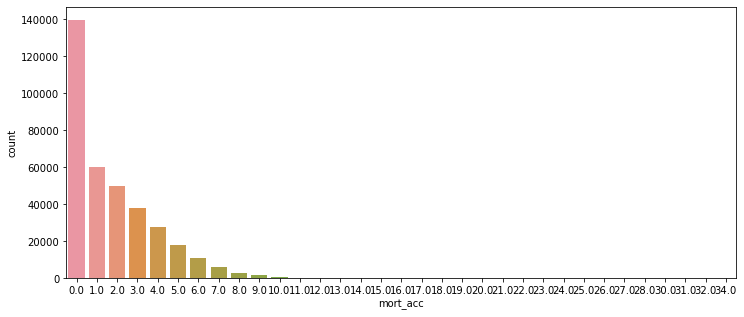

In [9]:
plt.figure(figsize=(12,5))
sns.countplot(x='mort_acc', data=data)

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='count'>

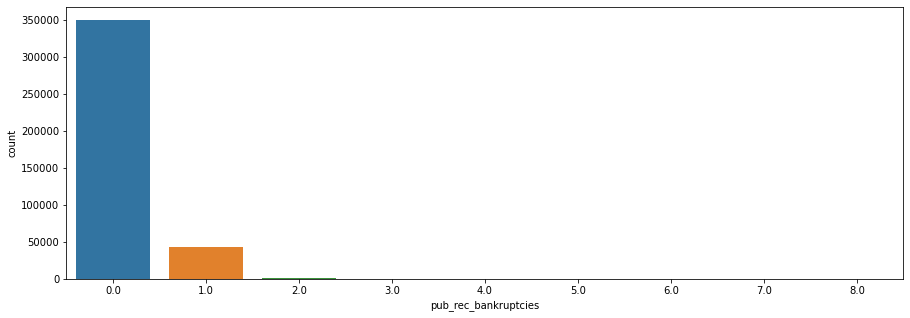

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(x='pub_rec_bankruptcies', data=data)

array([[<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'int_rate'}>,
        <AxesSubplot:title={'center':'installment'}>],
       [<AxesSubplot:title={'center':'annual_inc'}>,
        <AxesSubplot:title={'center':'dti'}>,
        <AxesSubplot:title={'center':'open_acc'}>],
       [<AxesSubplot:title={'center':'pub_rec'}>,
        <AxesSubplot:title={'center':'revol_bal'}>,
        <AxesSubplot:title={'center':'revol_util'}>],
       [<AxesSubplot:title={'center':'total_acc'}>,
        <AxesSubplot:title={'center':'mort_acc'}>,
        <AxesSubplot:title={'center':'pub_rec_bankruptcies'}>]],
      dtype=object)

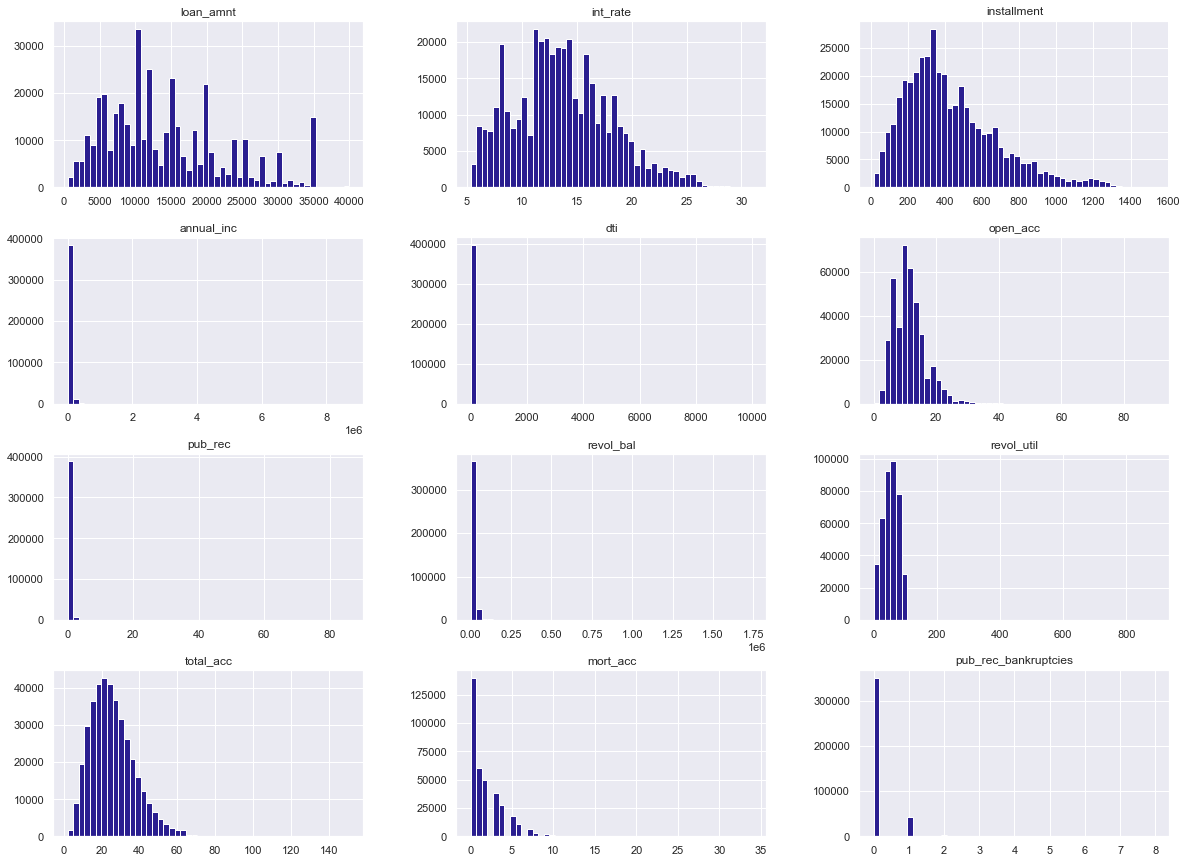

In [11]:
sns.set()
data.hist(bins=50,figsize=(20,15),color='#2A1E90')

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

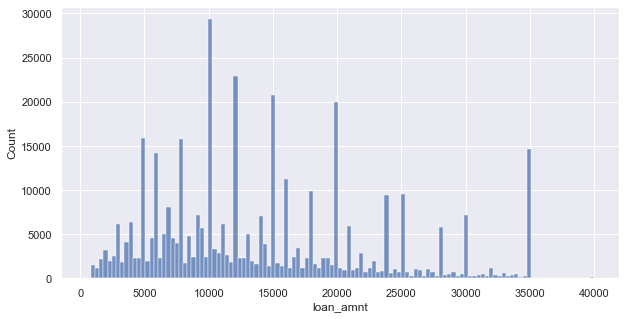

In [12]:
# loan amnt is the amount of the loan applied for by the borrower
plt.figure(figsize=(10,5))
sns.histplot(data.loan_amnt)

In [13]:
data.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


<AxesSubplot:xlabel='sub_grade', ylabel='loan_amnt'>

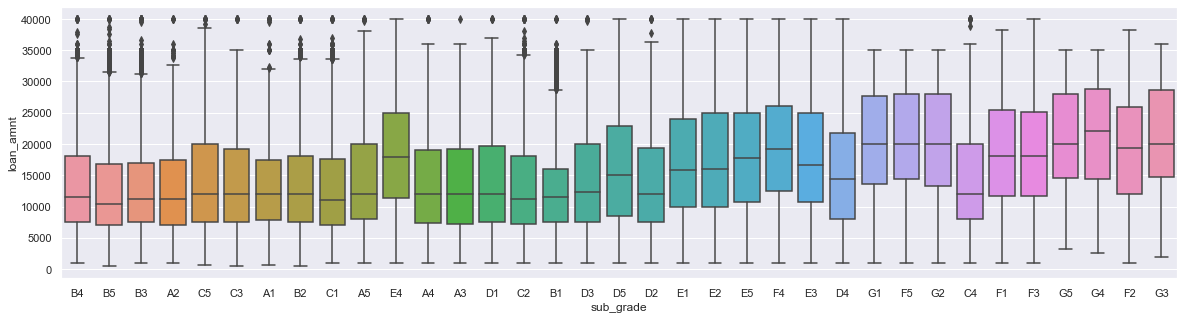

In [14]:
plt.figure(figsize=(20,5))
sns.boxplot(x="sub_grade", y="loan_amnt",data=data)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

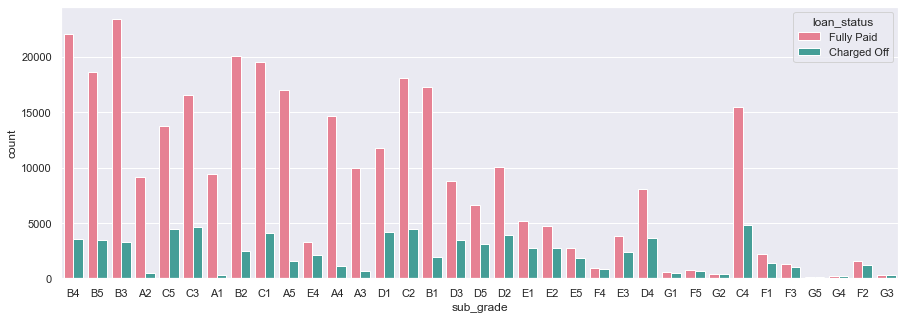

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(x='sub_grade',data=data,hue='loan_status',palette="husl")

<AxesSubplot:xlabel='grade', ylabel='count'>

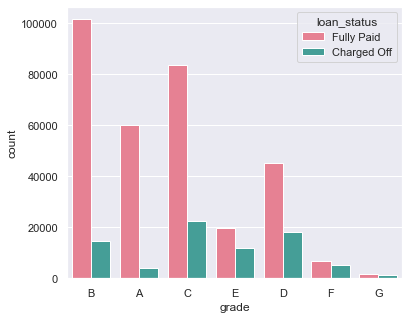

In [16]:
plt.figure(figsize=(6,5))
sns.countplot(x='grade',data=data,hue='loan_status',palette="husl")

#### correlation between features

In [17]:
# numric features only
data.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

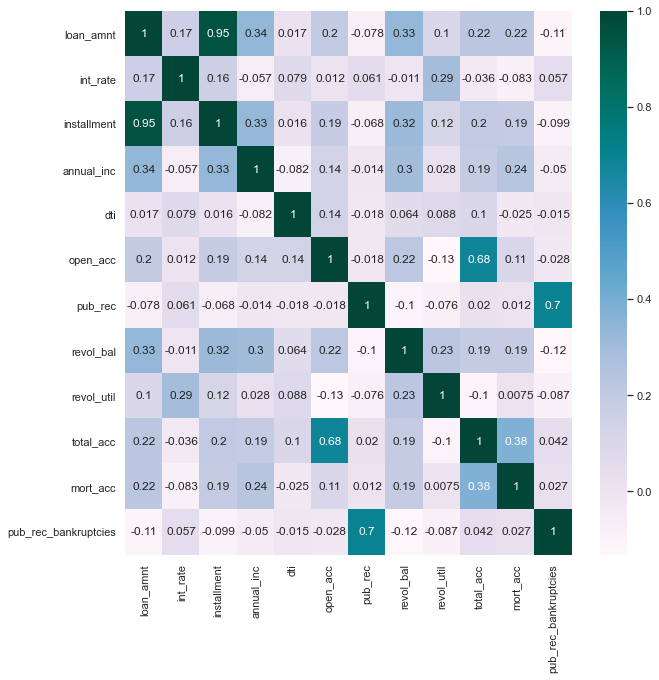

In [18]:
fig_dims=(10,10)
plt.subplots(figsize=fig_dims)
sns.heatmap(data.corr(),cmap="PuBuGn",annot=True)

In [19]:
corr_matrix=data.corr()
corr_matrix["loan_amnt"].sort_values(ascending=False)

loan_amnt               1.000000
installment             0.953929
annual_inc              0.336887
revol_bal               0.328320
total_acc               0.223886
mort_acc                0.222315
open_acc                0.198556
int_rate                0.168921
revol_util              0.099911
dti                     0.016636
pub_rec                -0.077779
pub_rec_bankruptcies   -0.106539
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

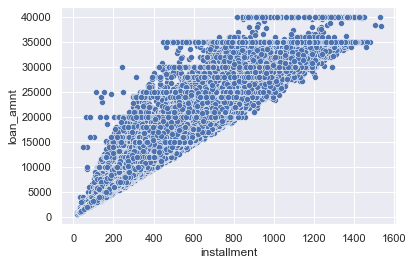

In [20]:
# there is a strong relation between installment and loan_amnt 
sns.scatterplot(x='installment',y='loan_amnt',data= data)

<AxesSubplot:xlabel='pub_rec', ylabel='pub_rec_bankruptcies'>

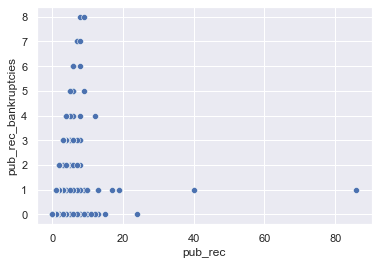

In [21]:
sns.scatterplot(x='pub_rec',y='pub_rec_bankruptcies',data= data)

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='loan_amnt'>

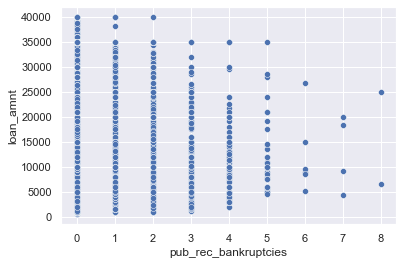

In [22]:
# negative corr
sns.scatterplot(x='pub_rec_bankruptcies',y='loan_amnt',data= data)

<AxesSubplot:xlabel='loan_amnt', ylabel='annual_inc'>

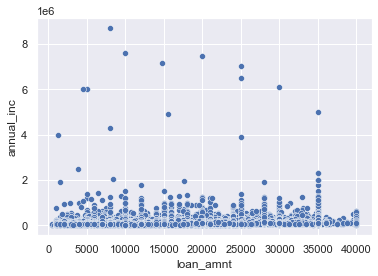

In [23]:
sns.scatterplot(x='loan_amnt',y='annual_inc',data= data)

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='loan_amnt'>

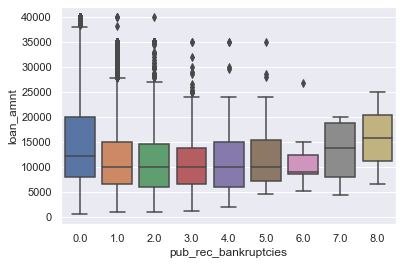

In [24]:
# pub_rec_bankruptcies:Number of public record bankruptcies
sns.boxplot(x="pub_rec_bankruptcies", y="loan_amnt",data=data)

### Pre-processing the data

In [25]:
# emp_title : The job title of the Borrower when applying for the loan
data['emp_title'].value_counts()
# as we can see there is 173105 unique job so one-hot encoding will not be effectiant 

Teacher             4389
Manager             4250
Registered Nurse    1856
RN                  1846
Supervisor          1830
                    ... 
G&K SERVICES           1
Waste Specialist       1
Water Operations       1
Calvin College         1
Veritext               1
Name: emp_title, Length: 173105, dtype: int64

In [26]:
# I decided to drop emp_title column
data = data.drop('emp_title',axis=1)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

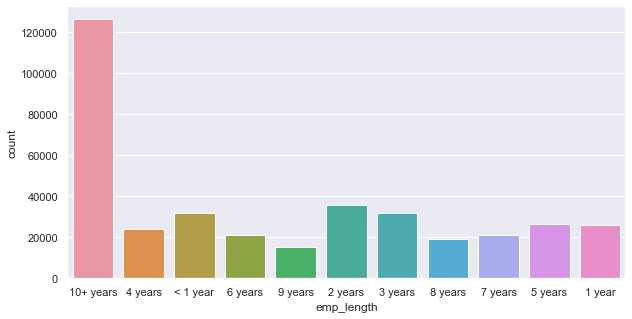

In [27]:
# emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less 
# than one year and 10 means ten or more years.
plt.figure(figsize=(10,5))
sns.countplot(x='emp_length',data=data)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

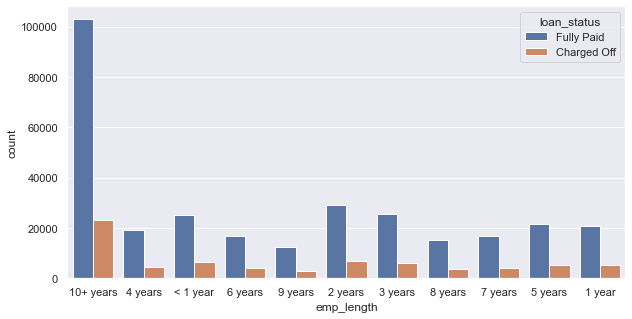

In [28]:
# let's see how loan_status column and emp
plt.figure(figsize=(10,5))
sns.countplot(x='emp_length',data=data,hue='loan_status')
# since charged off is very semiler for all emp length i decided to drop it

In [29]:
data = data.drop('emp_length',axis=1)

In [30]:
# now if we compared title column and purpose column we will find out that both have same catigories(more info in title column)
# and because title column have missing values ill drop it 
data['title'].value_counts()

Debt consolidation               152472
Credit card refinancing           51487
Home improvement                  15264
Other                             12930
Debt Consolidation                11608
                                  ...  
Safe Loan for Growth Capital          1
Cash Only                             1
Credits Cards                         1
Dext Consolidation                    1
Focused on the Future                 1
Name: title, Length: 48817, dtype: int64

In [31]:
# purpose column
data['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [32]:
data = data.drop('title',axis=1)

In [33]:
# mort_acc : Number of mortgage accounts
median2=data["mort_acc"].median()
data["mort_acc"].fillna(median2,inplace=True)

In [34]:
# pub_rec_bankruptcies :Number of public record bankruptcies 
# since number of null value is small i decided to drop null value in this column
data = data.dropna()
data.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

### Categorical features

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   home_ownership        395219 non-null  object 
 7   annual_inc            395219 non-null  float64
 8   verification_status   395219 non-null  object 
 9   issue_d               395219 non-null  object 
 10  loan_status           395219 non-null  object 
 11  purpose               395219 non-null  object 
 12  dti                   395219 non-null  float64
 13  earliest_cr_line      395219 non-null  object 
 14  open_acc              395219 non-null  float64
 15  

In [36]:
# term column :The number of payments on the loan. Values are in months and can be either 36 or 60.
# I'll replace object value with 36 or 60 value
data['term'] = data['term'].apply(lambda term: int(term[:3]))

In [37]:
# grade column is part of subgrade column so i'll drop it
data = data.drop('grade',axis=1)
data = data.drop('issue_d',axis=1)

In [38]:
# home_ownership : The home ownership status provided by the borrower during registration or 
# obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
data["home_ownership"].value_counts()
# notice there is any and none catigories i decided to put both catigories in other catigory

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [39]:
data['home_ownership']=data['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [40]:
data.address

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [41]:
data['zip_code'] = data['address'].apply(lambda address:int(address[-5:]))
data = data.drop('address',axis=1)

In [42]:
data['zip_code']

0         22690
1          5113
2          5113
3           813
4         11650
          ...  
396025    30723
396026     5113
396027    70466
396028    29597
396029    48052
Name: zip_code, Length: 395219, dtype: int64

In [43]:
import sklearn 
from sklearn.preprocessing import OneHotEncoder
def oneHot(a):
    cat_encoder=OneHotEncoder()
    ec_cat=cat_encoder.fit_transform(data[[a]])
    data[a]=ec_cat.toarray()

In [44]:
oneHot("sub_grade")
oneHot("home_ownership")
oneHot("purpose")
oneHot("application_type")
oneHot("earliest_cr_line")

In [45]:
# verfification_status
data.replace({"Source Verified": 2, "Verified": 1.0,"Not Verified":0.0}, inplace=True)

In [46]:
# initial_list_status
data.replace({"w": 1, "f": 0}, inplace=True)

In [47]:
data['loan_status']

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 395219, dtype: object

In [48]:
data.replace({"Fully Paid": 1.0, "Charged Off": 0.0}, inplace=True)

In [49]:
# The data is READY
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   sub_grade             395219 non-null  float64
 5   home_ownership        395219 non-null  float64
 6   annual_inc            395219 non-null  float64
 7   verification_status   395219 non-null  float64
 8   loan_status           395219 non-null  float64
 9   purpose               395219 non-null  float64
 10  dti                   395219 non-null  float64
 11  earliest_cr_line      395219 non-null  float64
 12  open_acc              395219 non-null  float64
 13  pub_rec               395219 non-null  float64
 14  revol_bal             395219 non-null  float64
 15  

In [50]:
data.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,zip_code
0,10000.0,36,11.44,329.48,0.0,0.0,117000.0,0.0,1.0,0.0,...,16.0,0.0,36369.0,41.8,25.0,1,0.0,0.0,0.0,22690
1,8000.0,36,11.99,265.68,0.0,1.0,65000.0,0.0,1.0,0.0,...,17.0,0.0,20131.0,53.3,27.0,0,0.0,3.0,0.0,5113
2,15600.0,36,10.49,506.97,0.0,0.0,43057.0,2.0,1.0,0.0,...,13.0,0.0,11987.0,92.2,26.0,0,0.0,0.0,0.0,5113
3,7200.0,36,6.49,220.65,0.0,0.0,54000.0,0.0,1.0,0.0,...,6.0,0.0,5472.0,21.5,13.0,0,0.0,0.0,0.0,813
4,24375.0,60,17.27,609.33,0.0,1.0,55000.0,1.0,0.0,0.0,...,13.0,0.0,24584.0,69.8,43.0,0,0.0,1.0,0.0,11650


### Split data

In [51]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(data,test_size=0.2,random_state=42)
train_set_x=train_set.drop(["loan_status"],axis=1)
train_set_y=train_set["loan_status"]
test_set_x = test_set.drop(["loan_status"],axis=1)
test_set_y = test_set["loan_status"]


### Normalizing data using StandardScaler

In [52]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
train_set_x = scaler.fit_transform(train_set_x)
test_set_x = scaler.transform(test_set_x)


### Train and Test model

#### Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(train_set_x, train_set_y)

RandomForestClassifier(random_state=42)

In [54]:
from sklearn.metrics import classification_report
# 1:Fully paid 0:Charged Off
print(forest_clf.predict(test_set_x))
print(classification_report(test_set_y,forest_clf.predict(test_set_x)))

[1. 1. 1. ... 1. 1. 1.]
              precision    recall  f1-score   support

         0.0       0.93      0.46      0.62     15421
         1.0       0.88      0.99      0.93     63623

    accuracy                           0.89     79044
   macro avg       0.91      0.73      0.78     79044
weighted avg       0.89      0.89      0.87     79044



#### K Neighbors Classifier

In [55]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=2)
kn.fit(train_set_x,train_set_y)

KNeighborsClassifier(n_neighbors=2)

In [56]:
print(kn.predict(test_set_x))
print(classification_report(test_set_y, kn.predict(test_set_x)))

[1. 0. 1. ... 1. 1. 1.]
              precision    recall  f1-score   support

         0.0       0.36      0.55      0.43     15421
         1.0       0.87      0.76      0.81     63623

    accuracy                           0.72     79044
   macro avg       0.62      0.66      0.62     79044
weighted avg       0.77      0.72      0.74     79044



#### Decision Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier
tree_alg=DecisionTreeClassifier()
tree_alg.fit(train_set_x,train_set_y)

DecisionTreeClassifier()

In [58]:
print(tree_alg.predict(test_set_x))
print(classification_report(test_set_y,tree_alg.predict(test_set_x)))

[1. 1. 1. ... 0. 1. 1.]
              precision    recall  f1-score   support

         0.0       0.56      0.60      0.58     15421
         1.0       0.90      0.89      0.89     63623

    accuracy                           0.83     79044
   macro avg       0.73      0.74      0.74     79044
weighted avg       0.83      0.83      0.83     79044



#### Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
logistic_alg=LogisticRegression()
logistic_alg.fit(train_set_x,train_set_y)

LogisticRegression()

In [60]:
print(logistic_alg.predict(test_set_x))
print(classification_report(test_set_y,logistic_alg.predict(test_set_x)))

[1. 1. 0. ... 1. 1. 1.]
              precision    recall  f1-score   support

         0.0       0.70      0.30      0.42     15421
         1.0       0.85      0.97      0.91     63623

    accuracy                           0.84     79044
   macro avg       0.78      0.64      0.67     79044
weighted avg       0.82      0.84      0.81     79044



#### Neural Network

In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [86]:
model = Sequential()

model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19, activation='relu'))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [87]:
x = np.asarray(train_set_x).astype('float32')
model.fit(x=train_set_x, y=train_set_y, epochs=30,batch_size=256,validation_data=(test_set_x, test_set_y))

Epoch 1/30
1236/1236 [==============================] - 3s 3ms/step - loss: 0.3900 - val_loss: 0.3588
Epoch 2/30
1236/1236 [==============================] - 3s 2ms/step - loss: 0.3655 - val_loss: 0.3571
Epoch 3/30
1236/1236 [==============================] - 3s 3ms/step - loss: 0.3567 - val_loss: 0.3419
Epoch 4/30
1236/1236 [==============================] - 3s 3ms/step - loss: 0.3219 - val_loss: 0.2811
Epoch 5/30
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2920 - val_loss: 0.2765
Epoch 6/30
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2810 - val_loss: 0.2751
Epoch 7/30
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2826 - val_loss: 0.2757
Epoch 8/30
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2779 - val_loss: 0.2739
Epoch 9/30
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2772 - val_loss: 0.2742
Epoch 10/30
1236/1236 [==============================] - 3s 2ms/step - loss: 0.278

<AxesSubplot:>

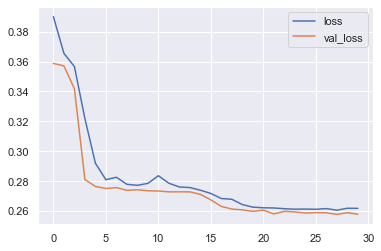

In [88]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [89]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = model.predict_classes(test_set_x)
print(classification_report(test_set_y,predictions))

              precision    recall  f1-score   support

         0.0       0.98      0.44      0.61     15421
         1.0       0.88      1.00      0.94     63623

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [90]:
confusion_matrix(test_set_y,predictions)

array([[ 6796,  8625],
       [  129, 63494]], dtype=int64)

### Fine tune 

In [ ]:
# Grid search for Random forest 
# from sklearn.model_selection import GridSearchCV
# param_grid = [
#  {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
#  {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
#  ]
# grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
#  scoring='neg_mean_squared_error',
# return_train_score=True)
# grid_search.fit(train_set_x, train_set_y)


### Simple Check

In [110]:
X_new = test_set_x[:20]
y_proba = model.predict(X_new)
y_proba.round(2)


array([[0.79],
       [0.67],
       [0.59],
       [1.  ],
       [1.  ],
       [0.72],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.92],
       [1.  ],
       [0.79],
       [0.81],
       [0.75],
       [1.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [0.84],
       [1.  ]], dtype=float32)

In [111]:
model.predict_classes(X_new)

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1]])

In [112]:
test_set_y[:20]

251650    0.0
161400    1.0
365051    1.0
27512     1.0
263208    1.0
129353    0.0
201385    1.0
332870    1.0
381911    1.0
80688     1.0
306626    1.0
35391     0.0
86104     1.0
212633    1.0
195550    1.0
143153    0.0
187015    1.0
4189      0.0
172726    1.0
190442    1.0
Name: loan_status, dtype: float64